<a href="https://colab.research.google.com/github/AndoniFikri/Machine-Learning-Model-on-Telco-Customer-Churn/blob/main/Telco_Customer_Churn_Machine_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

## Load dataset

In [ ]:
df = pd.read_csv('Telco Customer Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Preprocessing

In [ ]:
#Find Missing Data Value
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#Changing Total Charges Data Set to Float 
#Changing TotalCharges Data set to float data type seems not working. I've identified there are some blank values in the data. 
#Thus, replacing the blank values to NaN is needed. 
df = df.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
#Recheck Missing Value 
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There is total 11 blank data on Total Charges, Thus we need to see what is the percentage of the missing data so that we know what type of action we are gonna do for that data.  

In [ ]:
df.isna().sum() * 100 / len(df)

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

Conclusion : There are Missing data in the total charges column, but the numbers are far below 5%, then dropping the data is the right option. 
 

In [ ]:
#Drop the data and change TotalCharges Data type to Float 
df = df.dropna()
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Simple EDA for identifying customer that is churning or not

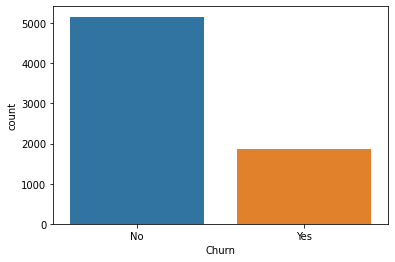

In [ ]:
sns.countplot(df['Churn'])

Simple Conclusion: From our target variable, it seems that the data set is imbalanced data set.

In [ ]:
#Grouping the data into categorical and numerical data 
categorical = ['customerID','gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
               'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
               'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
numerical = ['SeniorCitizen', 'tenure', 'MonthlyCharges','TotalCharges']

In [ ]:
df[categorical].describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


See categorical data more than 3 for label encoding preprocessing.

##Label Encoding

In [ ]:
#More than 3 categorical data type count 
df['MultipleLines'].value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [ ]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [ ]:
df['OnlineSecurity'].value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

In [ ]:
df['OnlineBackup'].value_counts()

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

In [ ]:
df['DeviceProtection'].value_counts()

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

In [ ]:
df['TechSupport'].value_counts()

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

In [ ]:
df['StreamingTV'].value_counts()

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64

In [ ]:
df['StreamingMovies'].value_counts()

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64

In [ ]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [ ]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

conclusion: there are some data type that has multiple 'no' meaning. This has to be changed so that the result will be single 'no' meaning.

In [ ]:
#Change the other no meaning to single no meaning for labelencoding
Column_Multiple_No = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                     'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for item in Column_Multiple_No:
  df[item] = [1 if each == "Yes" else 0 for each in df[item]]
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,0,DSL,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,0,DSL,1,...,1,0,0,0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,0,DSL,1,...,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,0,DSL,1,...,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,0,Fiber optic,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Recheck Value
df['MultipleLines'].value_counts()

0    4065
1    2967
Name: MultipleLines, dtype: int64

In [ ]:
#Change yes or no data type to 1 and 0 
Yes_No_Data = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for item in Yes_No_Data:
  df[item] = [1 if each == "Yes" else 0 for each in df[item]]
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
#Change male and gender data
gender = ['gender']
for item in gender:
  df[item] = [1 if each == "Male" else 0 for each in df[item]]
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   int64  
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   int64  
 10  OnlineBackup      7032 non-null   int64  
 11  DeviceProtection  7032 non-null   int64  
 12  TechSupport       7032 non-null   int64  
 13  StreamingTV       7032 non-null   int64  
 14  StreamingMovies   7032 non-null   int64  
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   int64  


for the rest categorical data which is `InternetService`, `Contract`, and `PaymentMethod` we will apply mean encoding.

###Mean Encoding for `InternetService`



In [ ]:
iservice = df['InternetService'].value_counts().reset_index()
iservice.rename(columns={"index": "InternetService", "InternetService": "freq_InternetService"}, inplace = True)
iservice

,InternetService,freq_InternetService
0,Fiber optic,3096
1,DSL,2416
2,No,1520


In [ ]:
#By Target Frequency 
sum_is = df.groupby(['InternetService']).agg({'Churn':sum}).reset_index()
sum_is.rename(columns={"Churn": "sum_is"}, inplace = True)
sum_is

,InternetService,sum_is
0,DSL,459
1,Fiber optic,1297
2,No,113


In [ ]:
mean_ec = iservice.merge(sum_is, on='InternetService', how='inner')
mean_ec['mean_ec_is'] = round((mean_ec['sum_is']/mean_ec['freq_InternetService']),2)
mean_ec

,InternetService,freq_InternetService,sum_is,mean_ec_is
0,Fiber optic,3096,1297,0.42
1,DSL,2416,459,0.19
2,No,1520,113,0.07


In [ ]:
df = df.merge(mean_ec[['InternetService','mean_ec_is']], on='InternetService', how='inner')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,mean_ec_is
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,0.19
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,...,0,0,0,One year,0,Mailed check,56.95,1889.50,0,0.19
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,0.19
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,0.19
4,6713-OKOMC,0,0,0,0,10,0,0,DSL,1,...,0,0,0,Month-to-month,0,Mailed check,29.75,301.90,0,0.19


###Mean Encoding for `Contract`

In [ ]:
freq_contract = df['Contract'].value_counts().reset_index()
freq_contract.rename(columns={"index": "Contract", "Contract": "freq_Contract"}, inplace = True)
freq_contract

,Contract,freq_Contract
0,Month-to-month,3875
1,Two year,1685
2,One year,1472


In [ ]:
#By target Frequency 
sum_contract = df.groupby(['Contract']).agg({'Churn':sum}).reset_index()
sum_contract.rename(columns={"Churn": "sum_contract"}, inplace = True)
sum_contract

,Contract,sum_contract
0,Month-to-month,1655
1,One year,166
2,Two year,48


In [ ]:
mean_contract = freq_contract.merge(sum_contract, on='Contract', how='inner')
mean_contract['mean_ec_con'] = round((mean_contract['sum_contract']/mean_contract['freq_Contract']),2)
mean_contract

,Contract,freq_Contract,sum_contract,mean_ec_con
0,Month-to-month,3875,1655,0.43
1,Two year,1685,48,0.03
2,One year,1472,166,0.11


In [ ]:
df = df.merge(mean_contract[['Contract','mean_ec_con']], on='Contract', how='inner')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,mean_ec_is,mean_ec_con
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,...,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,0.19,0.43
1,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,...,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,0.19,0.43
2,6713-OKOMC,0,0,0,0,10,0,0,DSL,1,...,0,0,Month-to-month,0,Mailed check,29.75,301.90,0,0.19,0.43
3,9763-GRSKD,1,0,1,1,13,1,0,DSL,1,...,0,0,Month-to-month,1,Mailed check,49.95,587.45,0,0.19,0.43
4,4190-MFLUW,0,0,1,1,10,1,0,DSL,0,...,0,0,Month-to-month,0,Credit card (automatic),55.20,528.35,1,0.19,0.43


###Frequency Encoding for `PaymentMethod`

In [ ]:
freq_payment = df['PaymentMethod'].value_counts().reset_index()
freq_payment.rename(columns={"index": "PaymentMethod", "PaymentMethod": "freq_payment_method"}, inplace = True)
freq_payment['pct_payment_method'] = round((freq_payment['freq_payment_method']/freq_payment['freq_payment_method'].sum())*100,2)
freq_payment

,PaymentMethod,freq_payment_method,pct_payment_method
0,Electronic check,2365,33.63
1,Mailed check,1604,22.81
2,Bank transfer (automatic),1542,21.93
3,Credit card (automatic),1521,21.63


In [ ]:
df = df.merge(freq_payment[['PaymentMethod','pct_payment_method']], on='PaymentMethod', how='inner')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,mean_ec_is,mean_ec_con,pct_payment_method
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,0.19,0.43,33.63
1,8779-QRDMV,1,1,0,0,1,0,0,DSL,0,...,1,Month-to-month,1,Electronic check,39.65,39.65,1,0.19,0.43,33.63
2,8665-UTDHZ,1,0,1,1,1,0,0,DSL,0,...,0,Month-to-month,0,Electronic check,30.20,30.20,1,0.19,0.43,33.63
3,4080-IIARD,0,0,1,0,13,1,1,DSL,1,...,0,Month-to-month,1,Electronic check,76.20,981.45,0,0.19,0.43,33.63
4,5122-CYFXA,0,0,0,0,3,1,0,DSL,0,...,1,Month-to-month,1,Electronic check,75.30,244.10,0,0.19,0.43,33.63


##Drop Unused Data Column

In [ ]:
df = df.drop(['customerID','InternetService', 'Contract', 'PaymentMethod'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              7032 non-null   int64  
 1   SeniorCitizen       7032 non-null   int64  
 2   Partner             7032 non-null   int64  
 3   Dependents          7032 non-null   int64  
 4   tenure              7032 non-null   int64  
 5   PhoneService        7032 non-null   int64  
 6   MultipleLines       7032 non-null   int64  
 7   OnlineSecurity      7032 non-null   int64  
 8   OnlineBackup        7032 non-null   int64  
 9   DeviceProtection    7032 non-null   int64  
 10  TechSupport         7032 non-null   int64  
 11  StreamingTV         7032 non-null   int64  
 12  StreamingMovies     7032 non-null   int64  
 13  PaperlessBilling    7032 non-null   int64  
 14  MonthlyCharges      7032 non-null   float64
 15  TotalCharges        7032 non-null   float64
 16  Churn 

##Machine Learning Modelling

###Feature Selection, Split Data, Scaling

In [ ]:
#Feature Selection 
X = df.drop(['Churn'], axis=1) 
Y = df['Churn']

In [ ]:
#Data Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [ ]:
#Split Data 70% Train 30% Test for Logistic Regression
X_train_Logreg, X_test_Logreg,Y_train_Logreg,Y_test_Logreg = train_test_split(X_std,
                                                Y,
                                                test_size = 0.3,
                                                random_state = 42)

In [ ]:
#Split Data 70% Train 30% Test for Decision Tree
X_train_DT, X_test_DT,Y_train_DT,Y_test_DT = train_test_split(X_std,
                                                Y,
                                                test_size = 0.3,
                                                random_state = 42)

###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_Logreg, Y_train_Logreg)

LogisticRegression(random_state=42)

###Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_DT,Y_train_DT)

DecisionTreeClassifier(random_state=42)

## Evaluation

In [ ]:
#Model Prediction
prediction_logreg= logreg.predict(X_test_Logreg)
prediction_DT = dt.predict(X_test_DT)

###Logistic Regression Evaluation for Imbalanced Data 

In [ ]:
#F1 Score, Precision, and Recall 
from sklearn.metrics import classification_report
print(classification_report(Y_test_Logreg,prediction_logreg))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1548
           1       0.64      0.54      0.58       562

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [ ]:
#AUC Score 
from sklearn.metrics import roc_auc_score
print('AUC ',roc_auc_score(Y_test_Logreg,prediction_logreg))

AUC  0.7134507158818175


###Decision Tree Evaluation for Imbalanced Data

In [ ]:
#F1 Score, Precision, and Recall 
from sklearn.metrics import classification_report
print(classification_report(Y_test_DT,prediction_DT))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1548
           1       0.49      0.50      0.49       562

    accuracy                           0.73      2110
   macro avg       0.65      0.65      0.65      2110
weighted avg       0.73      0.73      0.73      2110



In [ ]:
#AUC Score 
from sklearn.metrics import roc_auc_score
print('AUC ',roc_auc_score(Y_test_DT,prediction_DT))

AUC  0.6529364028432968


Conclusion: 
1. Logistic Regresion is better for modeling customer churn prediction rather than Decision Tree.
2. Decision tree modelling sometimes tends to overfit the data since the model split on many different combination whereas logistic regression associate only one parameter on each feature.